🌳 Key Decision Tree Parameters:
---

max_depth 🧱
----
👉 Limits how deep the tree can grow

📉 Prevents overfitting by avoiding very deep trees.

-----

min_samples_split ✂️
----
👉 Minimum samples needed to split a node

🚫 Higher value = fewer splits = more general tree.

-----

min_samples_leaf 🍃
----
👉 Minimum samples at a leaf node

✅ Ensures each leaf has enough data to make stable decisions.

-----

max_features 🎯
----
👉 Number of features to consider at each split

🤏 Limits how much of the data is used per split, improving generalization.

-----

criterion ⚖️
----
👉 How the quality of a split is measured

🔸 "gini" = Gini Impurity

🔹 "entropy" = Information Gain

-----

splitter 🔀
----
👉 How the best split is chosen

🏆 "best" = chooses best split

🎲 "random" = adds randomness (can help prevent overfitting)

-----

max_leaf_nodes 🍂
----
👉 Caps the number of leaf nodes

🔒 Controls model complexity to reduce overfitting.

-----

min_impurity_decrease 📉
----
👉 Minimum impurity drop to allow a split

🚦 Controls tree growth—if improvement isn’t enough, it won’t split.

# First Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.patheffects as PathEffects

In [3]:
sns.set(style='whitegrid')
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


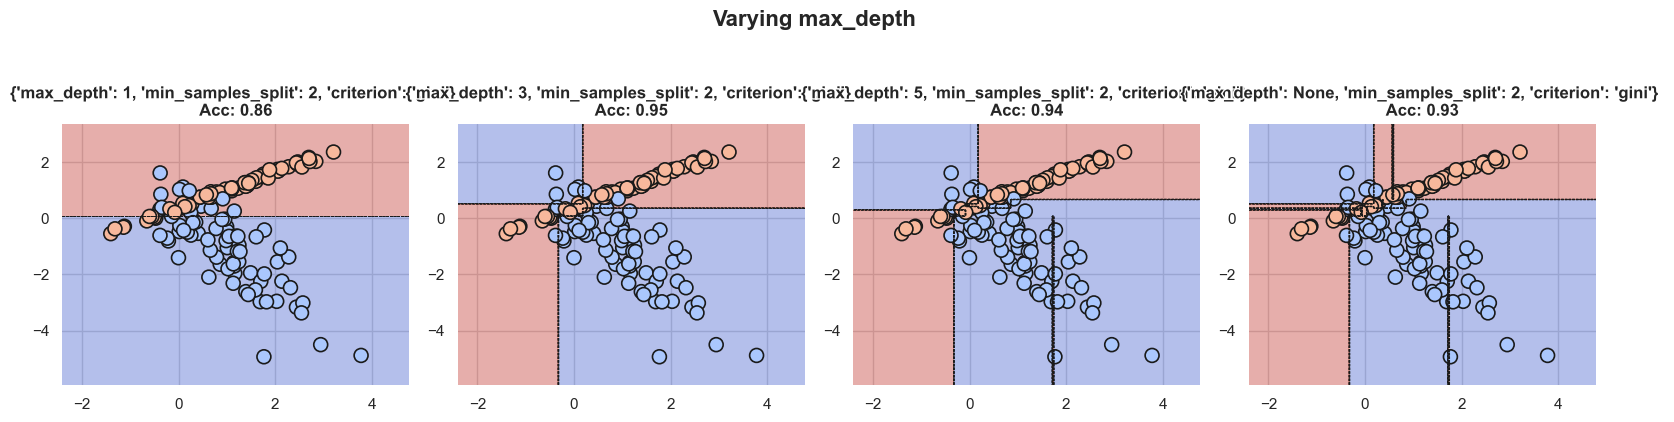

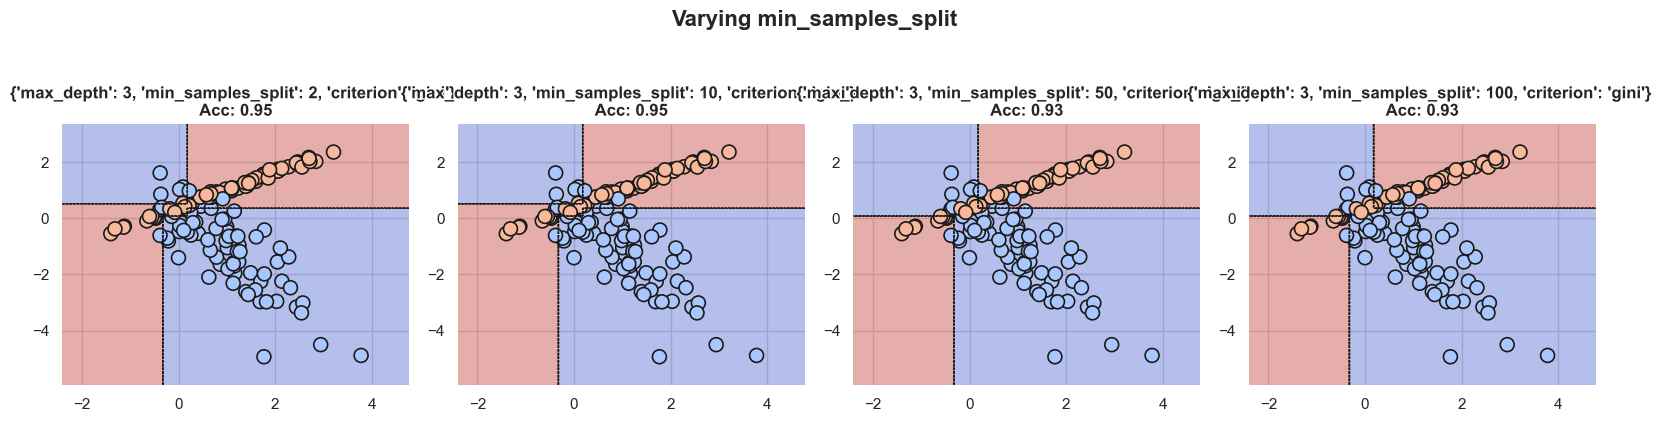

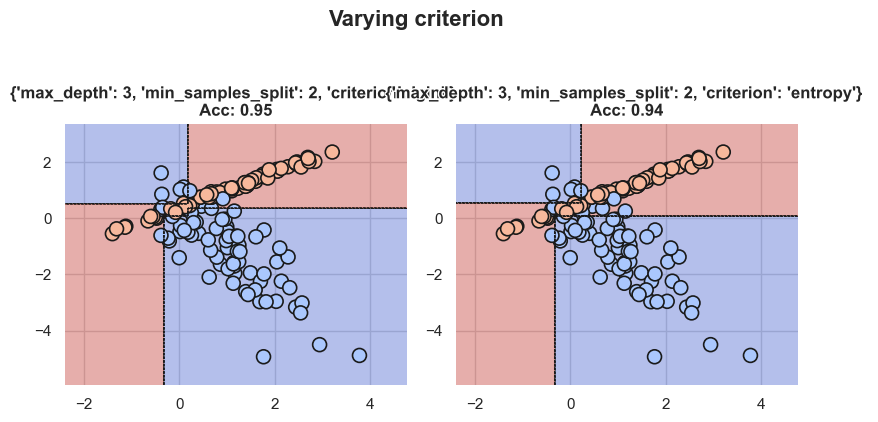

In [4]:
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    ax.contour(xx, yy, Z, colors='k', linewidths=0.5, linestyles='--')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm',
                    ax=ax, s=100, edgecolor='k', linewidth=1.2, legend=False)
    ax.set_facecolor("#f7f7f7")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    txt = ax.set_title(title, fontsize=12, fontweight='bold')
    txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='white')])
    ax.tick_params(left=False, bottom=False)
    for spine in ax.spines.values():
        spine.set_visible(False)

# 3. Define parameter variations
param_sets = {
    "Varying max_depth": [
        {"max_depth": 1, "min_samples_split": 2, "criterion": "gini"},
        {"max_depth": 3, "min_samples_split": 2, "criterion": "gini"},
        {"max_depth": 5, "min_samples_split": 2, "criterion": "gini"},
        {"max_depth": None, "min_samples_split": 2, "criterion": "gini"},
    ],
    "Varying min_samples_split": [
        {"max_depth": 3, "min_samples_split": 2, "criterion": "gini"},
        {"max_depth": 3, "min_samples_split": 10, "criterion": "gini"},
        {"max_depth": 3, "min_samples_split": 50, "criterion": "gini"},
        {"max_depth": 3, "min_samples_split": 100, "criterion": "gini"},
    ],
    "Varying criterion": [
        {"max_depth": 3, "min_samples_split": 2, "criterion": "gini"},
        {"max_depth": 3, "min_samples_split": 2, "criterion": "entropy"},
    ]
}

# 4. Create 3 visual sections
for section_title, configs in param_sets.items():
    fig, axs = plt.subplots(1, len(configs), figsize=(4 * len(configs), 4))
    fig.suptitle(section_title, fontsize=16, fontweight='bold', y=1.05)

    if len(configs) == 1:
        axs = [axs]

    for i, config in enumerate(configs):
        clf = DecisionTreeClassifier(**config, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        subtitle = f"{config} \nAcc: {acc:.2f}"
        plot_decision_boundary(clf, X_test, y_test, axs[i], subtitle)

    plt.tight_layout()
    plt.show()

# Second Example

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

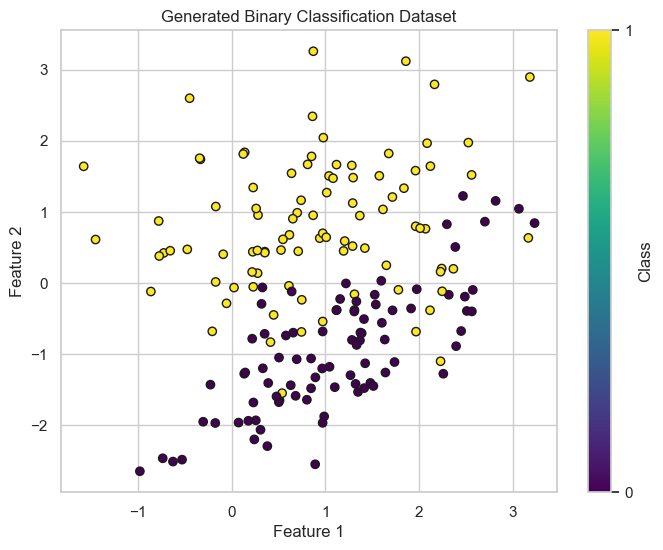

In [6]:
total_points = 180
X, y = make_classification(n_samples=total_points, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=0)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Generated Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(ticks=[0, 1], label='Class')
plt.grid(True)
plt.show()


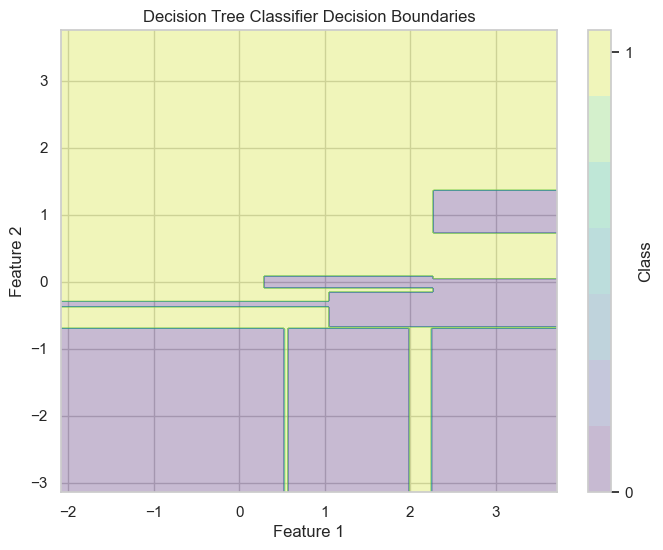

In [11]:
clf = DecisionTreeClassifier(max_depth=5)

# Train the classifier
clf.fit(X, y)

# Plot decision boundary
plt.figure(figsize=(8, 6))

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.title('Decision Tree Classifier Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(ticks=[0, 1], label='Class')
plt.grid(True)
plt.show()

# Gridserach CV

In [13]:
param_grid = {
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_leaf_nodes': [None, 10, 20, 50],
    'min_impurity_decrease': [0.0, 0.01, 0.1]
}


In [14]:
clf = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

In [15]:
grid_search.fit(X, y)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'criterion': 'entropy', 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validation accuracy: 0.89


# Practical Example

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [17]:
df = pd.read_csv('default of credit card.csv')

In [19]:
df.shape

(30000, 8)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=2)

In [46]:
clf_credit_card = DecisionTreeClassifier()

In [42]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [43]:
y_pred = clf.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
print("Accuracy of Decision Trees",accuracy_score(y_test,y_pred))

Accuracy of Decision Trees 0.7775


In [47]:
param_grid2 = {
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_leaf_nodes': [None, 10, 20, 50],
    'min_impurity_decrease': [0.0, 0.01, 0.1]
}


In [48]:
clf_credit_card = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(estimator=clf_credit_card, param_grid=param_grid2, cv=5, scoring='accuracy')

In [49]:
grid_search.fit(X, y)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'criterion': 'entropy', 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validation accuracy: 0.89
